<a href="https://colab.research.google.com/github/seo-jeong-bang/seo-jeong.github.io/blob/main/%EC%9D%80%ED%96%89%EB%8C%80%EC%B6%9C%20%EC%8A%B9%EC%9D%B8%EC%97%AC%EB%B6%80%20%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
df= pd.read_csv('/content/X_train.csv')
df_x_test = pd.read_csv('/content/X_test.csv')
df_y_train = pd.read_csv('/content/Y_train.csv')
df_y_test = pd.read_csv('/content/Y_test.csv')

In [4]:
df_x=pd.concat([df,df_x_test])

In [5]:
df_x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
91,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600,180,0,Semiurban
92,LP001367,Male,Yes,1,Graduate,No,3052,1030.0,100,360,1,Urban
93,LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200,360,1,Semiurban
94,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157,360,1,Rural


대출 승인 여부 예측

Loan_ID


Gender 성별


Married 결혼 유무


Dependents 부양 가족


Education 교육


Self_Employed 자영업자


ApplicantIncome 신청자 소득 (월)


CoapplicantIncome 공동 신청자 소득


LoanAmount 대출금 (1=1000달러)


Loan_Amount_Term 대출 기간 (달)


Credit_History 신용 기록


Property_Area 부동산 지역



In [6]:
df_x.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


필요없는 칼럼인 Loan_ID를 제거해주었다. 

In [7]:
df_x.drop(['Loan_ID'],axis=1,inplace=True)


유의미한 분석을 얻기 위해 x_train과 y_train을 합쳐주었다.


In [8]:
df_training= pd.concat([df,df_y_train],axis=1)

In [9]:
df_training

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Target
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban,Y
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban,Y
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban,Y
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban,Y
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119,360,0,Rural,N
380,LP001841,Male,No,0,Not Graduate,Yes,2583,2167.0,104,360,1,Rural,Y
381,LP002820,Male,Yes,0,Graduate,No,5923,2054.0,211,360,1,Rural,Y
382,LP001744,Male,No,0,Graduate,No,2971,2791.0,144,360,1,Semiurban,Y


#2. 데이터 살펴보기

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(5,5))


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

##1.각 항목별 value_counts

In [11]:
df_gender=pd.DataFrame(df['Gender'].value_counts())
df_gender

,Gender
Male,318
Female,66


In [12]:
df_married=pd.DataFrame(df['Married'].value_counts())
df_married

,Married
Yes,250
No,134


In [13]:
df_dependent=pd.DataFrame(df['Dependents'].value_counts())
df_dependent

,Dependents
0,225
2,69
1,61
3+,29


In [14]:
df_education=pd.DataFrame(df['Education'].value_counts())
df_education

,Education
Graduate,308
Not Graduate,76


##pie그림 하나씩 넣은거

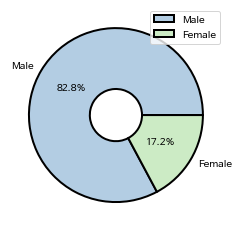

In [15]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap('Pastel1')
colors = cmap(np.array([1,2,3,4,5,6,7,8,9]))
w = {"edgecolor": "black", "linewidth":2, "width":0.7}

plt.pie(df_gender['Gender'],labels=df_gender.index,autopct='%.1f%%',wedgeprops=w,colors=colors)
plt.legend(df_gender.index)



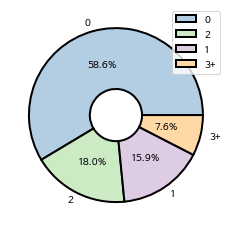

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cmap = plt.get_cmap('Pastel1')
colors = cmap(np.array([1,2,3,4,5,6,7,8,9]))


w = {"edgecolor": "black", "linewidth":2, "width":0.7}
#colors = sns.color_palette('hls',len(df_married))
plt.pie(df_dependent['Dependents'],labels=df_dependent.index,autopct='%.1f%%',wedgeprops=w,colors=colors)
plt.legend(df_dependent.index)

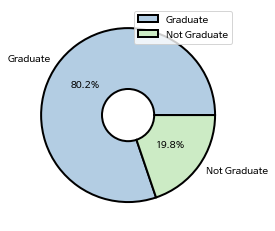

In [17]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap('Pastel1')
colors = cmap(np.array([1,2,3,4,5,6,7,8,9]))
w = {"edgecolor": "black", "linewidth":2, "width":0.7}

plt.pie(df_education['Education'],labels=df_education.index,autopct='%.1f%%',wedgeprops=w,colors=colors)
plt.legend(df_education.index)


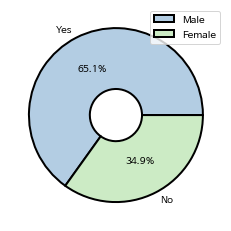

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
cmap = plt.get_cmap('Pastel1')
colors = cmap(np.array([1,2,3,4,5,6,7,8,9]))


w = {"edgecolor": "black", "linewidth":2, "width":0.7}
#colors = sns.color_palette('hls',len(df_married))
plt.pie(df_married['Married'],labels=df_married.index,autopct='%.1f%%',wedgeprops=w,colors=colors)
plt.legend(df_gender.index)

##파이 그림

Text(0.5, 1.0, '남녀 비율')

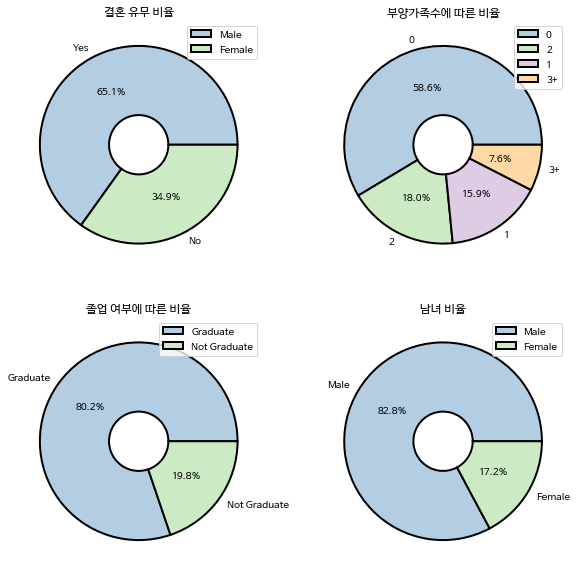

In [19]:
fig = plt.subplots(2,2, figsize = (10,10))

ax1 = plt.subplot(221)
cmap = plt.get_cmap('Pastel1')
colors = cmap(np.array([1,2,3,4,5,6,7,8,9]))

w = {"edgecolor": "black", "linewidth":2, "width":0.7}
#colors = sns.color_palette('hls',len(df_married))
ax1.pie(df_married['Married'],labels=df_married.index,autopct='%.1f%%',wedgeprops=w,colors=colors)
plt.legend(df_gender.index)
ax1.set_title('결혼 유무 비율')


ax2=plt.subplot(222)

ax2.pie(df_dependent['Dependents'],labels=df_dependent.index,autopct='%.1f%%',wedgeprops=w,colors=colors)
plt.legend(df_dependent.index)
ax2.set_title('부양가족수에 따른 비율')



ax3=plt.subplot(223)
ax3.pie(df_education['Education'],labels=df_education.index,autopct='%.1f%%',wedgeprops=w,colors=colors)
plt.legend(df_education.index)
ax3.set_title('졸업 여부에 따른 비율')


ax4=plt.subplot(224)
ax4.pie(df_gender['Gender'],labels=df_gender.index,autopct='%.1f%%',wedgeprops=w,colors=colors)
plt.legend(df_gender.index)
ax4.set_title('남녀 비율')

##파이 그림 겹친거

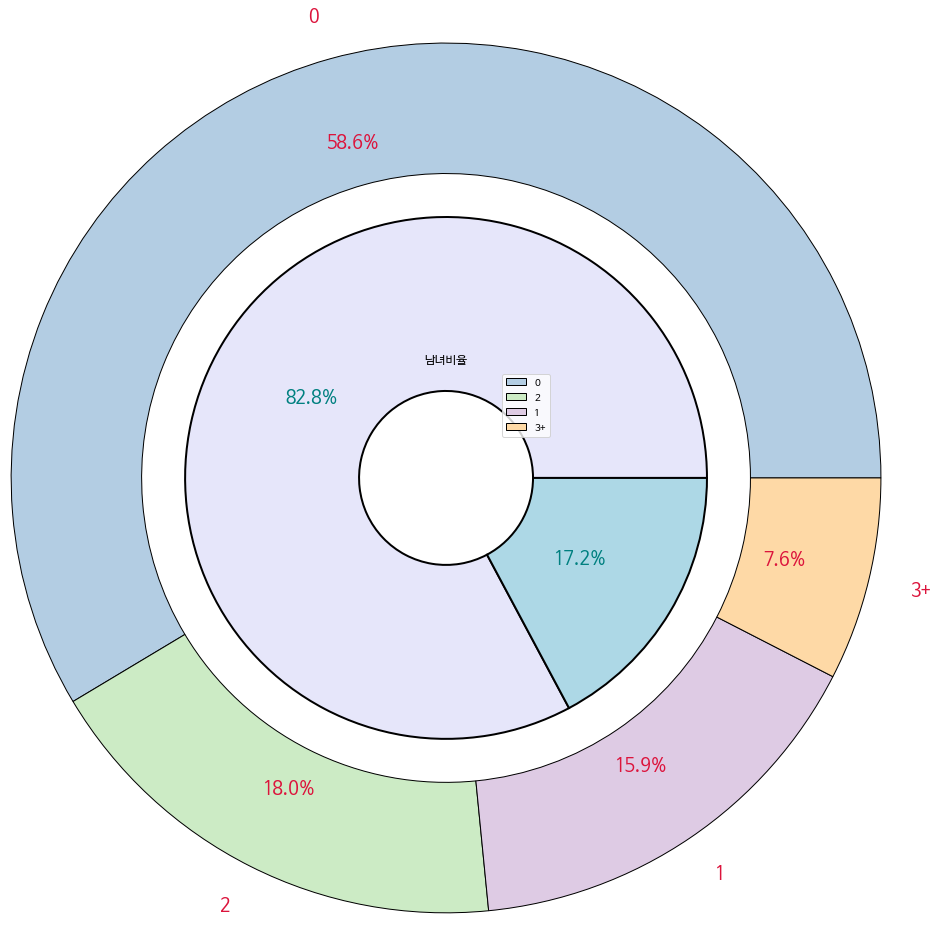

In [20]:
fig,ax = plt.subplots()
cmap = plt.get_cmap('Pastel1')
colors = cmap(np.array([1,2,3,4,5,6,7,8,9]))
w = {"edgecolor": "black", "linewidth":2, "width":0.7}

p,ts,at = ax.pie(df_dependent['Dependents'],radius=5,colors = colors,
                 autopct='%.1f%%', pctdistance=0.8,rotatelabels=False,
                 wedgeprops=dict(width=1.5,edgecolor='black'),textprops={'fontsize':18},labels=df_dependent.index)


plt.legend(df_dependent.index)

for t in ts:
    t.set_color('crimson')
for autotext in at:
    autotext.set_color('crimson')


p,ts,at = ax.pie(df_gender['Gender'],radius=3,colors = ['lavender','lightblue'],
                autopct='%.1f%%', rotatelabels= True, pctdistance=0.6,
               wedgeprops=dict(width=2,edgecolor='black',linewidth=2),textprops={'fontsize':18}) 
ax.set_title('남녀비율')


           
for t in ts:
    t.set_color('lightseagreen')
for autotext in at:
    autotext.set_color('teal')

ax.set(aspect='equal')
plt.savefig('pie')

##dddd

In [21]:
df_no_se=pd.DataFrame(df[df['Self_Employed']=='No']['ApplicantIncome'])

In [22]:
df_yes_se=pd.DataFrame(df[df['Self_Employed']=='Yes']['ApplicantIncome'])

In [23]:
df_yes_se.describe()

,ApplicantIncome
count,54.000000
mean,7739.222222
std,6242.205246
min,1000.000000
25%,3612.750000
50%,6150.000000
75%,9500.750000
max,39147.000000


In [24]:
df_no_se.describe()

,ApplicantIncome
count,330.000000
mean,4725.981818
std,5020.310707
min,150.000000
25%,2785.500000
50%,3749.000000
75%,5031.500000
max,81000.000000


In [25]:
df_se = pd.DataFrame({'se_yes':[1000,7739,9500,39147],'se_no':[150,4726,5031,81000]})


In [26]:
df_se.rename(index={0: 'min',1:'means',2:'75%',3:'max'},inplace=True)
df_se

,se_yes,se_no
min,1000,150
means,7739,4726
75%,9500,5031
max,39147,81000


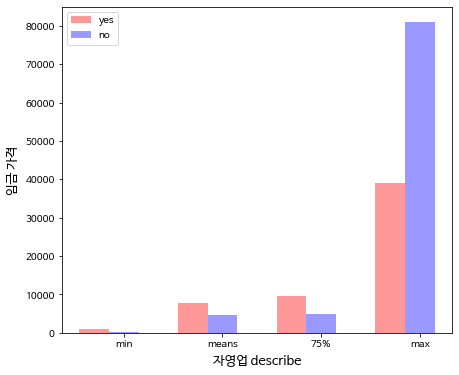

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(7,6))
bar_width = 0.3

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(4)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df_se['se_yes'], bar_width, alpha=0.4, color='red', label='yes')

b2 = plt.bar(index + bar_width, df_se['se_no'], bar_width, alpha=0.4, color='blue', label='no')

#b3 = plt.bar(index + 2 * bar_width, df_se['means'], bar_width, alpha=0.4, color='green', label='means')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 4 + bar_width, 1), df_se.index)

# x축, y축 이름 및 범례 설정
plt.xlabel('자영업 describe', size = 13)
plt.ylabel('임금 가격', size = 13)
plt.legend()
plt.show()


#3.전처리

-성별, 결혼유무,교육,자영업자,부동산 지역,부동산지역 수치화 해주기

In [28]:
df_x.replace({'Yes' : 1,
              'No' : 0,
              'Male' : 1,
              'Female' : 2,
              'Graduate' : 1,
              'Not Graduate' : 0,
              'Rural' : 1,
              'Semiurban' : 2,
              'Urban' : 3,
              '3+' : 3}, inplace = True)

#3.히트맵으로 보는 연관도

In [34]:
df_hm=df_x.corr()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


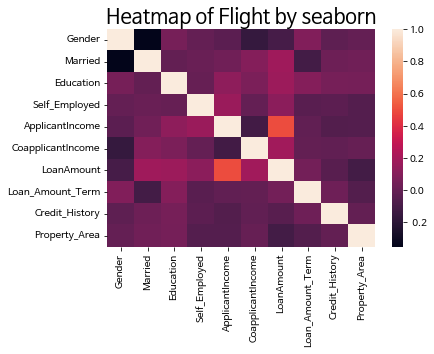

In [35]:
ax = sns.heatmap(df_hm)
plt.title('Heatmap of Flight by seaborn', fontsize=20)
plt.show()
